Predict The Flight Ticket Price 
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Dataset: https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Flight_Ticket_Participant_Datasets-20190305T100527Z-001.zip

Size of training set: 10683 records

Size of test set: 2671 records

<b>FEATURES:</b>
<b>Airline:</b> The name of the airline.

<b>Date_of_Journey:</b> The date of the journey

<b>Source:</b> The source from which the service begins.

<b>Destination:</b> The destination where the service ends.

<b>Route:</b> The route taken by the flight to reach the destination.

<b>Dep_Time:</b> The time when the journey starts from the source.

<b>Arrival_Time:</b> Time of arrival at the destination.

<b>Duration:</b> Total duration of the flight.

<b>Total_Stops:</b> Total stops between the source and destination.

<b>Additional_Info:</b> Additional information about the flight

<b>Price:</b> The price of the ticket

<b>Importing Necessary Libraries</b>

In [130]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler
import missingno as msno 
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV
os.chdir("C:/Users/SANKET/Music/Projects/Flight_Ticket_Participant_Datasets")

In [58]:
# Reading the Dataset
ticket_train= pd.read_excel("Data_Train.xlsx")
print("The shape of training data",ticket_train.shape)
ticket_test=pd.read_excel("Test_set.xlsx")
print("The shape of test data",ticket_test.shape)

The shape of training data (10683, 11)
The shape of test data (2671, 10)


In [59]:
# Merging the datasets
ticket=pd.concat([ticket_train, ticket_test],ignore_index=True)
ticket.head()

,Additional_Info,Airline,Arrival_Time,Date_of_Journey,Dep_Time,Destination,Duration,Price,Route,Source,Total_Stops
0,No info,IndiGo,01:10 22 Mar,24/03/2019,22:20,New Delhi,2h 50m,3897.0,BLR → DEL,Banglore,non-stop
1,No info,Air India,13:15,1/05/2019,05:50,Banglore,7h 25m,7662.0,CCU → IXR → BBI → BLR,Kolkata,2 stops
2,No info,Jet Airways,04:25 10 Jun,9/06/2019,09:25,Cochin,19h,13882.0,DEL → LKO → BOM → COK,Delhi,2 stops
3,No info,IndiGo,23:30,12/05/2019,18:05,Banglore,5h 25m,6218.0,CCU → NAG → BLR,Kolkata,1 stop
4,No info,IndiGo,21:35,01/03/2019,16:50,New Delhi,4h 45m,13302.0,BLR → NAG → DEL,Banglore,1 stop


In [60]:
ticket.shape

(13354, 11)

<b>Observation:</b>
There are 13354 rows and 11 columns in the dataset.

In [61]:
ticket.dtypes

Additional_Info     object
Airline             object
Arrival_Time        object
Date_of_Journey     object
Dep_Time            object
Destination         object
Duration            object
Price              float64
Route               object
Source              object
Total_Stops         object
dtype: object

<b>Observation:</b>
There are 11 attributes, out of which there are 10 attributes are of object datatype and 1 attribute is of float datatype.

<b>Checking the Missing Value in the Dataset</b>

In [62]:
ticket.isnull().sum()

Additional_Info       0
Airline               0
Arrival_Time          0
Date_of_Journey       0
Dep_Time              0
Destination           0
Duration              0
Price              2671
Route                 1
Source                0
Total_Stops           1
dtype: int64

<b>Observation:</b>
There are missing values in the attributes(Price, Route, Total_Stops).

In [63]:
# Filling the missing values of numerical attributes using mean
ticket['Price'] = ticket['Price'].fillna(ticket['Price'].mean())

In [64]:
# Filling the missing values of categorical attributes using mode
for column in ticket[["Route","Total_Stops"]]:
    mode = ticket[column].mode()
    ticket[column] = ticket[column].fillna(mode)[0]

In [65]:
ticket.isnull().sum()

Additional_Info    0
Airline            0
Arrival_Time       0
Date_of_Journey    0
Dep_Time           0
Destination        0
Duration           0
Price              0
Route              0
Source             0
Total_Stops        0
dtype: int64

In [66]:
ticket["Arrival_Time"]= pd.to_datetime(ticket["Arrival_Time"])
ticket["Dep_Time"]= pd.to_datetime(ticket["Dep_Time"])

In [67]:
x=(ticket["Arrival_Time"]-ticket["Dep_Time"])
Duration=list()
for i in range(len(x)):
    period=x.iloc[i].seconds/3600
    Duration.append(period)
ticket["Duration"]=Duration

In [68]:
# Lets drop the attribute Arrival_Time
ticket.drop(["Arrival_Time"],axis=1,inplace=True)

In [69]:
ticket["Additional_Info"].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
2 Long layover                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

In [70]:
ticket["Airline"].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [71]:
#"No info" and "No Info" are one and same thing and repaced by "No Info"
#For airlines we can combine the last few to their main tag as they are vey less in counts
ticket["Additional_Info"].replace("1 Long layover","Long layover",inplace=True)
ticket["Additional_Info"].replace("2 Long layover","Long layover",inplace=True)
ticket["Additional_Info"].replace("No info","No Info",inplace=True)
ticket["Airline"].replace("Jet Airways Business","Jet Airways",inplace=True)
ticket["Airline"].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
ticket["Airline"].replace("Vistara Premium economy","Vistara",inplace=True)

In [72]:
ticket["Destination"].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [73]:
#In Destination column "New Delhi" can be replaced by "Delhi"
ticket["Destination"].replace("New Delhi","Delhi",inplace=True)

In [75]:
# Now we need to exract features from dep_time
ticket["time_of_day"]=np.where((ticket["Dep_Time"].dt.hour>=0)&(ticket["Dep_Time"].dt.hour<=2),"Late Night",np.where((ticket["Dep_Time"].dt.hour>=3)&(ticket["Dep_Time"].dt.hour<=7),"Early Morning",np.where((ticket["Dep_Time"].dt.hour>=8)&(ticket["Dep_Time"].dt.hour<=11),"Morning",np.where((ticket["Dep_Time"].dt.hour>=12)&(ticket["Dep_Time"].dt.hour<=16),"Afternoon",np.where((ticket["Dep_Time"].dt.hour>=17)&(ticket["Dep_Time"].dt.hour<=19),"Evening","Night")))))

In [76]:
#Some of the columns we can drop like "Date_of_Journey","Route"
ticket.drop(["Date_of_Journey","Route"],axis=1,inplace=True)

<b>Exploratory Data Analysis</b>

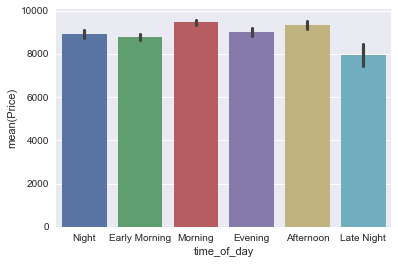

In [79]:
sns.barplot(x="time_of_day",y="Price",data=ticket)
plt.show()

<b>Observation:</b>
Most ticket are booked in Morning and Afternoon.

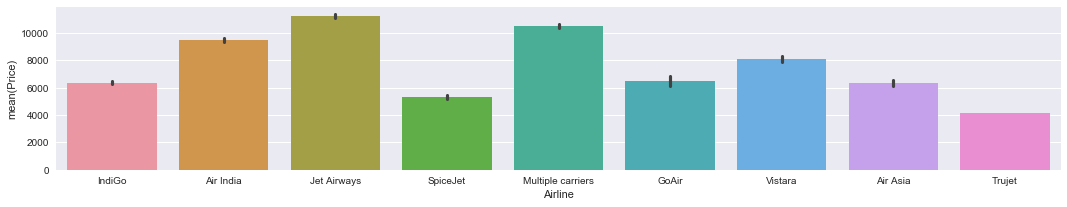

In [85]:
plt.figure(figsize=(18,3))
sns.barplot(x="Airline",y="Price",data=ticket)
plt.show()

<b>Observation:</b>
People prefer travelling in Jet Airways.

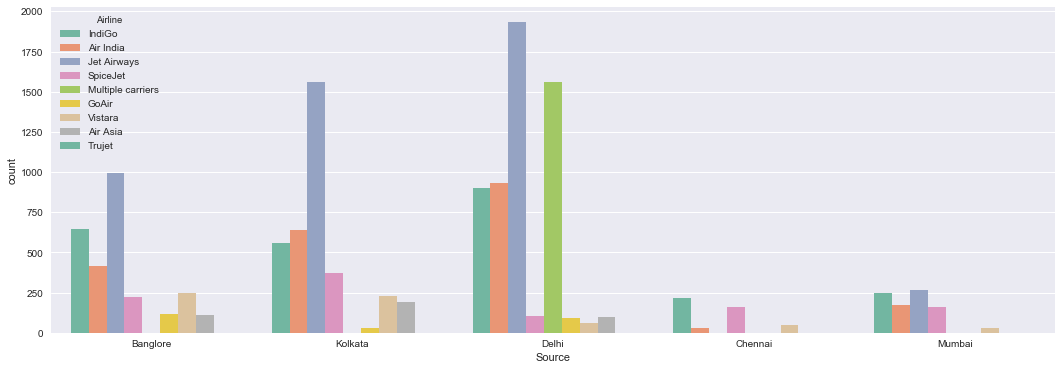

In [91]:
plt.figure(figsize=(18,6))
sns.countplot(x="Source",hue="Airline",data=ticket,palette="Set2")
plt.show()

<b>Observation:</b>
People prefer travelling in Jet Airways and source is Delhi.

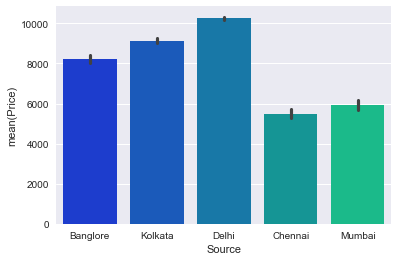

In [92]:
sns.barplot(x="Source",y="Price",data=ticket,palette="winter")
plt.show()

<b>Observation:</b>
Mostly people travel from Delhi.

In [93]:
# Dropping the Deep_Time
ticket.drop(["Dep_Time"],axis=1,inplace=True)

In [95]:
ticket.corr()

,Duration,Price
Duration,1.000000,0.403378
Price,0.403378,1.000000


In [97]:
# Converting the categorical variables
ticket=pd.get_dummies(ticket,columns=["Additional_Info","Airline","Destination","Source","Total_Stops","time_of_day"],drop_first=True)

<b>Dividing the input and output variables</b>

In [100]:
X= ticket.drop(["Price"],axis=1)
y= ticket["Price"]

In [101]:
# Lets bring the dataset features into same scale
sc=StandardScaler()
X= sc.fit_transform(X)

<b>Splitting the data into train and test(70:30)</b>

In [102]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [103]:
# We are using R2 score to evaluate
from sklearn.metrics import r2_score
def max_r2_score(models,X,y):
    max_r2_score=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state)
        models.fit(X_train,y_train)
        y_pred= models.predict(X_test)
        score=r2_score(y_test,y_pred)
        if score>max_r2_score:
            max_r2_score=score
            final_r2_score=r_state
    print("Maximum R2_Score corresponding:",final_r2_score," and it is :",round((max_r2_score),2))

# Machine Learning Models:

As the target variable is continuous, its a regression Problem. We are implementing KNN Regressor, Random Forest Regressor and Gradient Boosting regressor.

<b>KNN Regressor</b>

In [111]:
m1=KNeighborsRegressor()
parameters={"n_neighbors":range(2,30)}
m1= GridSearchCV(m1,parameters,cv=5)
m1.fit(X,y)
m1.best_params_

{'n_neighbors': 29}

In [112]:
m1= KNeighborsRegressor(n_neighbors=29)
max_r2_score(m1,X,y)

Maximum R2_Score corresponding: 98  and it is : 0.51


In [113]:
pred_m1= m1.predict(X_test)
score_m1= m1.score(X_test, y_test)

In [116]:
# Cross validation score
from sklearn.model_selection import cross_val_score
mean_m1=cross_val_score(m1,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for KNN Regressor:",mean_m1)
std_m1=cross_val_score(m1,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for KNN Regressor:",std_m1)

Mean R2 Score for KNN Regressor: -6.887264776786796e+29
Standard Deviation in R2 Score for KNN Regressor: 1.3778098994640234e+30


In [121]:
from sklearn import metrics
m1_rmse = np.sqrt(metrics.mean_squared_error(y_test,pred_m1))
m1_rmse

2900.1036665165616

<b>Random Forest Regressor</b>

In [122]:
m2=RandomForestRegressor()
param_grid = {
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [10, 12],
    'n_estimators': [100, 500]
}
m2= GridSearchCV(m2, param_grid,cv=5)
m2.fit(X,y)
m2.best_params_

{'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [123]:
m2=RandomForestRegressor(max_depth=100,max_features=2,min_samples_leaf=5,min_samples_split=12,n_estimators=100)
max_r2_score(m2,X,y)

Maximum R2_Score corresponding: 49  and it is : 0.55


In [124]:
pred_m2= m2.predict(X_test)
score_m2= m2.score(X_test, y_test)

In [125]:
# Cross validation score
mean_m2=cross_val_score(m2,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Random Forest Regressor:",mean_m2)
std_m2=cross_val_score(m2,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Random Forest Regression:",std_m2)

Mean R2 Score for Random Forest Regressor: -4.5117213319669376e+29
Standard Deviation in R2 Score for Random Forest Regression: 8.878780778096192e+29


In [128]:
# RMSE
m2_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_m2))
m2_rmse

2818.386388566762

<b>Gradient Boosting Regressor</b>

In [131]:
m3 = GradientBoostingRegressor()
parameters= {'learning_rate': [0.01, 0.03], 'subsample': [0.3, 0.5], 'n_estimators': [10,50], 'max_depth': [4,8]}
m3= GridSearchCV(estimator=m3, param_grid= parameters, cv=5, n_jobs=-1)
m3.fit(X,y)
m3.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.5}

In [132]:
gbi= GradientBoostingRegressor(learning_rate=0.01,max_depth=4,n_estimators=10,subsample=0.5)
max_r2_score(gbi,X,y)

Maximum R2_Score corresponding: 52  and it is : 0.09


In [133]:
pred_m3= m3.predict(X_test)
score_m3= m3.score(X_test, y_test)

In [134]:
# Cross validation score
mean_m3=cross_val_score(m3,X,y,cv=10,scoring="r2").mean()
print("Mean R2 Score for Gradient Boosting Regressor:",mean_m3)
std_m3=cross_val_score(m3,X,y,cv=10,scoring="r2").std()
print("Standard Deviation in R2 Score for Gradient Boosting Regressor:",std_m3)

Mean R2 Score for Gradient Boosting Regressor: -4.183760840694432e+29
Standard Deviation in R2 Score for Gradient Boosting Regressor: 8.562787711367282e+29


In [136]:
m3_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_m3))
m3_rmse

3945.3018304928046

# Evaluation:

In [139]:
#Lets initialise the data frame with columns model with r2_score and RMSE value
compare= [["KNN Regressor",m1_rmse],["Random Forest Regressor",m2_rmse],["Gradient Boosting Regressor",m3_rmse]]
result= pd.DataFrame(compare, columns=["Model Name","RMSE"], index=[1,2,3])
result

,Model Name,RMSE
1,KNN Regressor,2900.103667
2,Random Forest Regressor,2818.386389
3,Gradient Boosting Regressor,3945.301830


<b>Observations:</b>
<li> As the target variable is numerical, we have calculated R2 Score and evaluated RMSE for the performance of the models.</li>
<li>From the above Model Evaluation, we can see that Random Forest Regressor performed well with lowest RMSE (32818.386389).</li>

<b>Saving the Prediction</b>

In [140]:
np.savetxt('Model17.csv',pred_m2,delimiter=',')

In [141]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(m2, 'project17.pkl')

['project17.pkl']